In [1]:
import pandas as pd
import numpy as np
import os
import itertools
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import math
import itertools as itt
import sys
from collections import deque
import pickle
import seaborn as sns; sns.set()
import scipy as sc

In [2]:
data= np.loadtxt('C:/Users/Devanshu/Desktop/Project_action/Beef/Beef_TRAIN', delimiter=',')
print(data.shape)

(30, 470)


In [3]:
series_1= data[0]
series_2= data[1,0:30]
series_3= data[2]
series_4= data[10]

print(series_2.shape)
print(series_4.shape)

(30,)
(470,)


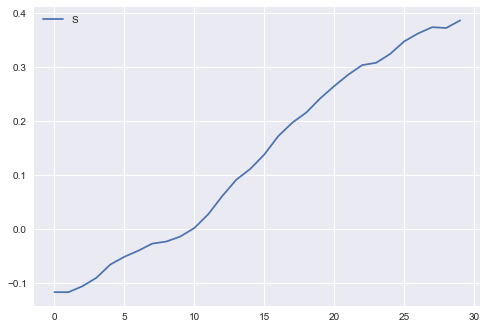

In [4]:
#plt.plot(series_1)
plt.plot(series_2)
plt.legend(('Series_2'))

plt.show()

# Distance profile

In [5]:
def _window_maker(data, window_size):
    
    _window_maker.collect_query=[]
    _window_maker.collect_subsequence=[]
    _window_maker.collect_values=[]
    
    if len(data)/ window_size <= 4:
        print('select another window')
    else:
            
        for i in range(0,len(data)):
                
            query= data[i:i+window_size]
            #query_col=([i,query])
            #_window_maker.collect_query.append(query_col)
            #print('Query',query)
                
            if len(query)!= window_size :
                return
                #print('discarded')
            else:
                query_col=([i,query])
                _window_maker.collect_query.append(query_col)
                for j in range(0,len(data),1):
                    subsequence= data[j:j+window_size]
                    #print('Subsequence',subsequence)
                        
                    if len(subsequence) != window_size :
                        #print('discarded')
                        break
                    else:
                        #print('Subsequence',subsequence)
                        collect_subseq= ([j,subsequence])
                        _window_maker.collect_subsequence.append(collect_subseq)
                        distance_value= dist= sc.spatial.distance.euclidean(query,subsequence)
                        collect_all_values= ([i,j,distance_value])
                        _window_maker.collect_values.append(collect_all_values)
                        #print('Query',query,'Subsequence',subsequence,'distance_value',distance_value)
                            
    
_window_maker(series_2,5)  #input to function is time series and window size user defined.

# Matrix visualization

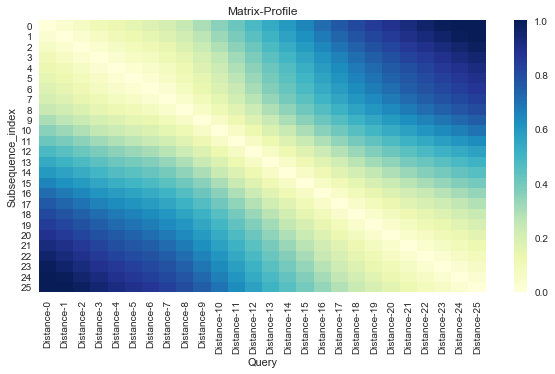

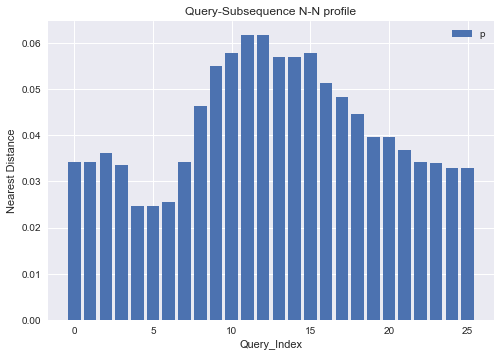

In [6]:
def matrix_visual(val,val1,val2):
    visual_df= pd.DataFrame(val,columns=['Index','Subsequence_index','Distance'])
    visual_df2=pd.DataFrame(val1,columns=['Index','Query'])
    visual_df3=pd.DataFrame(val2,columns=['Index','Subsequence'])
    
    visual_df1 = visual_df.drop(visual_df[visual_df.Distance <= 0].index)   #removing trivial matches i.e same query and subsequenc have distance of zero
    
    
    mini_for_each= pd.DataFrame(visual_df1.groupby(['Index'])['Distance'].min().round(5).reset_index())
    
    #Matrix_profile representation in pivot_table
    matrix_table= pd.pivot_table(visual_df, values=['Distance'],index='Subsequence_index',columns=(['Index']))
    
    #print(matrix_table)
    np.savetxt('C:/Users/Devanshu/Desktop/Project_action/Beef/Beef_TRAIN_matrix_profile.csv',matrix_table,delimiter=',',fmt='%5s')
    # Visualization in heat map
    
    import seaborn as sns; sns.set() #heat map library import
    plt.figure(figsize=(10,5))
    ax = sns.heatmap(matrix_table,vmin=0, vmax=1,cmap="YlGnBu") #heat map for Index vs Subsequence_index with values in distance.
    plt.title('Matrix-Profile')
    plt.xlabel('Query')
    plt.show()
    
    # Visualization of each query to its nearest distance in bar graph.
    
    plt.bar(mini_for_each.Index,mini_for_each.Distance)
    plt.xlabel('Query_Index')
    plt.ylabel('Nearest Distance')
    plt.title('Query-Subsequence N-N profile')
    plt.legend(('profiling_series'))
    plt.show()
        
matrix_visual(_window_maker.collect_values,_window_maker.collect_query,_window_maker.collect_subsequence)

# Top k motifs of each subsequence

In [7]:
# Nearest neighbour join 


df_q= pd.read_csv('C:/Users/Devanshu/Desktop/Project_action/Beef/Beef_TRAIN_matrix_profile.csv',sep=',',header=None)
#print(dfq.head(4))

In [8]:
def _knn_cluster(data):
    
    _knn_cluster.nsmall_value=[]
    
    for i in df_q.columns:
        asd1= df_q.drop(df_q.index[i])
        simin=asd1[i].nsmallest(3).reset_index()
        simax=asd1[i].nlargest(3).reset_index()
        sima=asd1[i].idxmin()
        #print(sima)
        _knn_cluster.nsmall_value.append(simin)
    
_knn_cluster(df_q)
print(_knn_cluster.nsmall_value[0:5])

[   index         0
0      1  0.034317
1      2  0.068004
2      3  0.101696,    index         1
0      0  0.034317
1      2  0.036126
2      3  0.071440,    index         2
0      1  0.036126
1      3  0.036833
2      0  0.068004,    index         3
0      4  0.033562
1      2  0.036833
2      5  0.056846,    index         4
0      5  0.024638
1      3  0.033562
2      6  0.048362]
